             municipio Agencias d Balnearios Campos de Empresas a Marinas tu  \
0          chimaltitan          0          2         0          0          0   
1             colotlan          3          3         0          0          0   
2             huejucar          2          1         0          0          0   
3  huejuquilla el alto          1          1         0          0          0   
4            mezquitic          1          0         0          0          0   

  Muelles de Transporta   año region                        geometry  
0          0          0  2013  norte  POINT (629368.785 2406930.847)  
1          0          0  2013  norte  POINT (682582.684 2437612.359)  
2          0          0  2013  norte  POINT (674733.925 2480698.234)  
3          0          0  2013  norte  POINT (612002.178 2493618.850)  
4          0          0  2013  norte  POINT (580276.572 2447415.408)  


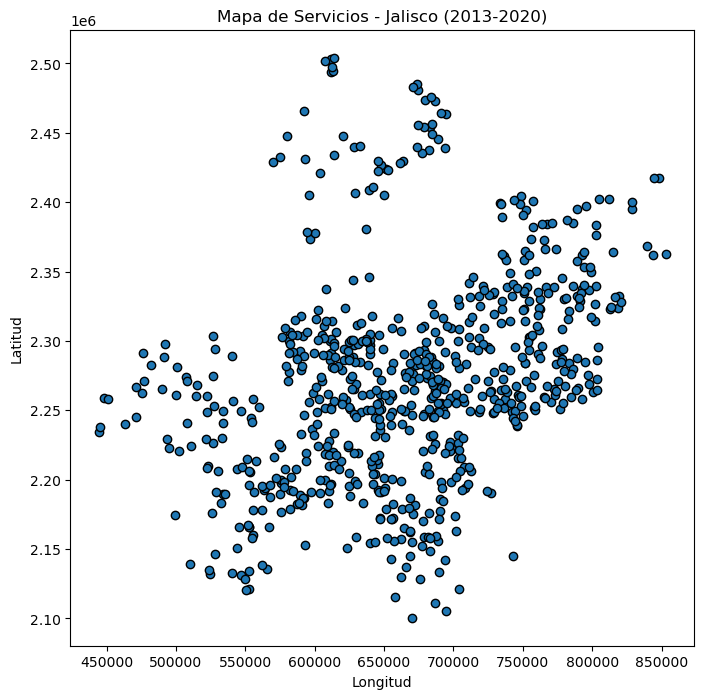

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Carga del shapefile (asegúrate que todos los archivos están en el mismo directorio)
gdf = gpd.read_file("df_servicios.shp")

# Mostrar las primeras filas
print(gdf.head())

# Visualizar el mapa
gdf.plot(figsize=(10, 8), edgecolor='black')
plt.title("Mapa de Servicios - Jalisco (2013-2020)")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()


In [4]:
# Cargar shapefile
gdf = gpd.read_file("df_servicios.shp")

# Contar frecuencia de valores únicos en una columna
print(gdf.value_counts())

municipio             Agencias d  Balnearios  Campos de  Empresas a  Marinas tu  Muelles de  Transporta  año   region             geometry                      
acatic                0           0           2          1           1           0           0           2020  altos sur          POINT (717653.344 2293822.343)    1
tamazula de gordiano  4           3           0          0           0           0           0           2014  sureste            POINT (682259.446 2176184.257)    1
talpa de allende      0           3           0          0           0           0           0           2014  sierra occidental  POINT (521360.002 2229343.755)    1
                                                                                                         2015  sierra occidental  POINT (507662.822 2240603.745)    1
                                                                                                         2016  sierra occidental  POINT (522018.605 2248663.669)    1
         

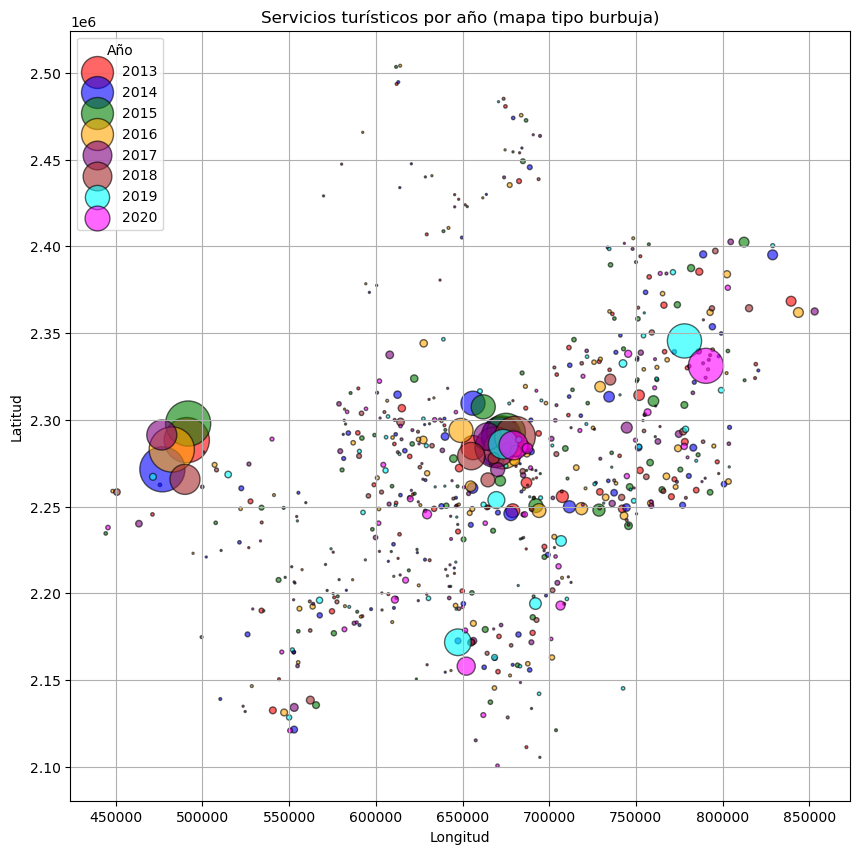

In [5]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Cargar shapefile
gdf = gpd.read_file("df_servicios.shp")

# Reemplaza valores no numéricos y convierte a número
cols_servicios = ['Agencias d', 'Balnearios', 'Campos de', 'Empresas a', 'Marinas tu', 'Muelles de', 'Transporta']
for col in cols_servicios:
    gdf[col] = pd.to_numeric(gdf[col], errors='coerce')

# Crear columna total
gdf['total_servicios'] = gdf[cols_servicios].sum(axis=1)

# Filtrar años válidos (sin 'N/D' o vacíos)
gdf = gdf[gdf['año'].apply(lambda x: str(x).isdigit())]

# Graficar con burbujas por año
fig, ax = plt.subplots(figsize=(12, 10))
colores = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'cyan', 'magenta']

for i, (año, grupo) in enumerate(gdf.groupby('año')):
    grupo.plot(
        ax=ax,
        markersize=grupo['total_servicios'] * 2,  # ajusta escala
        color=colores[i % len(colores)],
        alpha=0.6,
        label=str(año),
        edgecolor='black'
    )

plt.title("Servicios turísticos por año (mapa tipo burbuja)")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.legend(title="Año")
plt.grid(True)
plt.show()


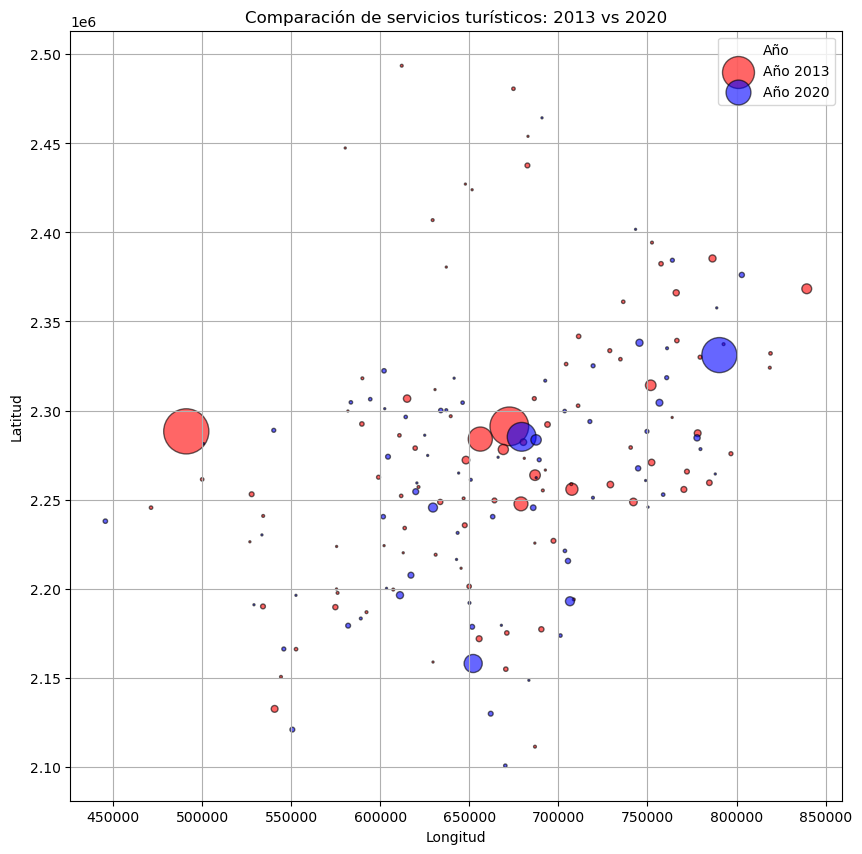

In [6]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Cargar shapefile
gdf = gpd.read_file("df_servicios.shp")

# Lista de columnas de servicios
cols_servicios = ['Agencias d', 'Balnearios', 'Campos de', 'Empresas a', 'Marinas tu', 'Muelles de', 'Transporta']

# Convertir a numérico
for col in cols_servicios:
    gdf[col] = pd.to_numeric(gdf[col], errors='coerce')

# Crear columna total
gdf['total_servicios'] = gdf[cols_servicios].sum(axis=1)

# Filtrar solo 2013 y 2020
gdf = gdf[gdf['año'].isin([2013, 2020])]

# Graficar
fig, ax = plt.subplots(figsize=(12, 10))
colores = ['red', 'blue']

for i, (año, grupo) in enumerate(gdf.groupby('año')):
    grupo.plot(
        ax=ax,
        markersize=grupo['total_servicios'] * 2,
        color=colores[i % len(colores)],
        alpha=0.6,
        label=f"Año {año}",
        edgecolor='black'
    )

plt.title("Comparación de servicios turísticos: 2013 vs 2020")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.legend(title="Año")
plt.grid(True)
plt.show()
